# ML_ python introduction & decision tree 2

In [109]:
# importing packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# importing packages
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc

from sklearn.model_selection import GridSearchCV, cross_val_score

### Data preprocessing

Documentation : https://pandas.pydata.org/docs/reference/index.html

In [2]:
# importing csv
data = pd.read_csv('titanic.csv')

In [5]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [4]:
# dropping useless features
data.drop(labels=['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [6]:
# transforming columns
sex_ = {'male':1, 'female':0}
data['Sex'].replace(sex_, inplace=True)
embarked_ = {'C': 1, 'Q': 2, 'S': 3}
data['Embarked'].replace(embarked_, inplace=True)

In [7]:
# missing values processing
print(data.isnull().sum())

## 1. 
#data['Age'] = data['Age'].fillna(data['Age'].mean()).astype(int)
#data.dropna(inplace=True)
## 2.
data.dropna(inplace=True)

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [8]:
data.shape

(712, 8)

In [9]:
# data consistency
data['Age'].value_counts()
data = data[(data['Age'] > 0) & (data['Age'] < 100)]

### Decision tree

Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn

In [14]:
# model variables definitions
y = data['Survived']
X = data.drop(labels=['Survived'], axis=1)

In [15]:
# splitting into train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42) 

In [16]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
703,3,1,25.0,0,0,7.7417,2.0
462,1,1,47.0,0,0,38.5000,3.0
858,3,0,24.0,0,3,19.2583,1.0
429,3,1,32.0,0,0,8.0500,3.0
811,3,1,39.0,0,0,24.1500,3.0
...,...,...,...,...,...,...,...
93,3,1,26.0,1,2,20.5750,3.0
135,2,1,23.0,0,0,15.0458,1.0
338,3,1,45.0,0,0,8.0500,3.0
549,2,1,8.0,1,1,36.7500,3.0


In [68]:
# calling decisiontree classifier
clf = DecisionTreeClassifier()
# fitting on data
clf = clf.fit(X_train, y_train)

In [69]:
# estimating on test
#estimate = clf.predict(X_test)
estimate = clf.predict_proba(X_test)[:,1]

In [70]:
# average diffence estimation true values
print(abs(y_test - estimate).mean())
print((y_test - estimate).std())

0.2949438202247191
0.5390616914059997


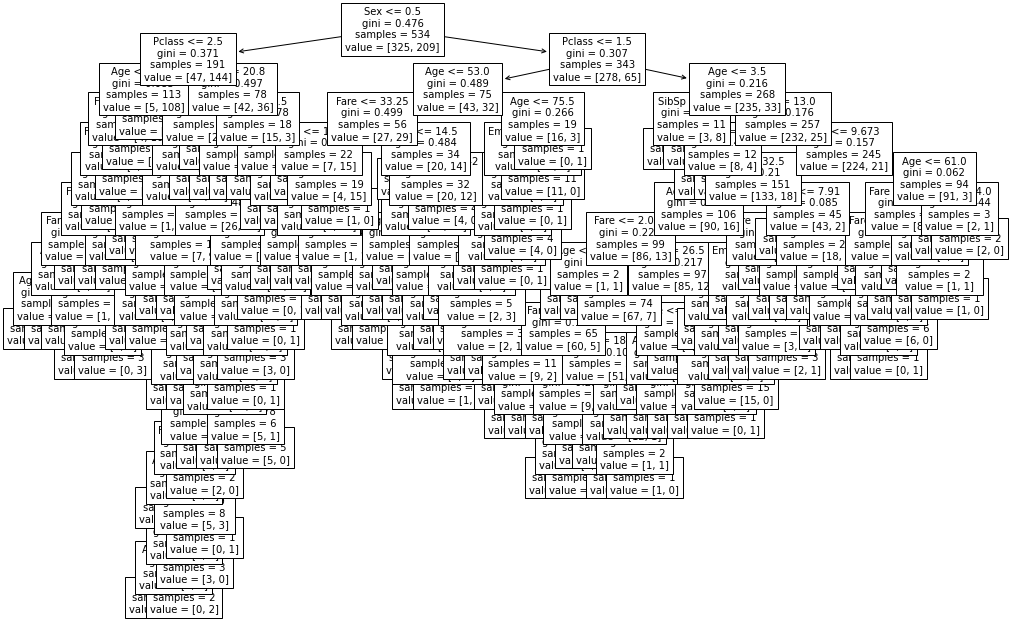

In [58]:
plt.figure(figsize=(17,11))
plot_tree(clf, feature_names = list(X_train.columns), fontsize=10)
plt.show()

#### Features importance

In [35]:
# creating features importance serie
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [33]:
feature_scores

Sex         0.488127
Pclass      0.275590
Age         0.115066
Fare        0.094077
Parch       0.027139
Embarked    0.000000
SibSp       0.000000
dtype: float64

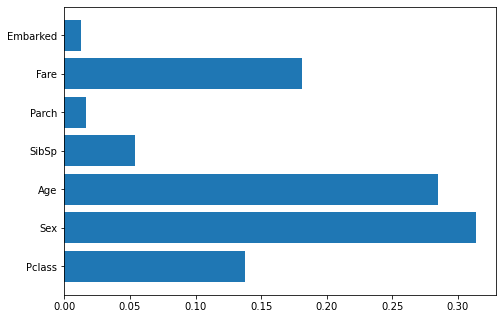

In [34]:
# plotting features importance
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
features = X_train.columns
importance = clf.feature_importances_
ax.barh(features,importance)
plt.show()

#### Classification evaluation

In [59]:
# accuracy
accuracy_score(y_test, estimate, normalize=True, sample_weight=None)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

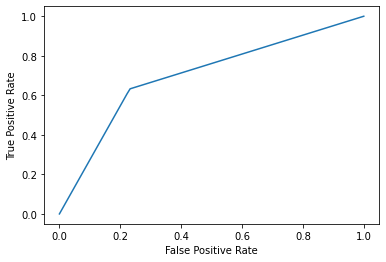

In [71]:
# ROC curve
fpr, tpr, _ = roc_curve(y_test,  estimate)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [72]:
# AUC
print(auc(fpr,tpr))

0.7005498018156247


####  modifying hyperparameters

In [76]:
# calling decisiontree classifier
clf_b = DecisionTreeClassifier(criterion= 'entropy', max_depth=5, min_samples_split=0.1)
# fitting on data
clf_b = clf_b.fit(X_train, y_train)
# estimating on test
#estimate_b = clf.predict(X_test)
estimate_b = clf_b.predict_proba(X_test)[:,1]
true = y_test
# average diffence estimation true values
print(abs(estimate_b - true).mean())
print((estimate_b - true).std())

0.2920438734945888
0.4240071261959226


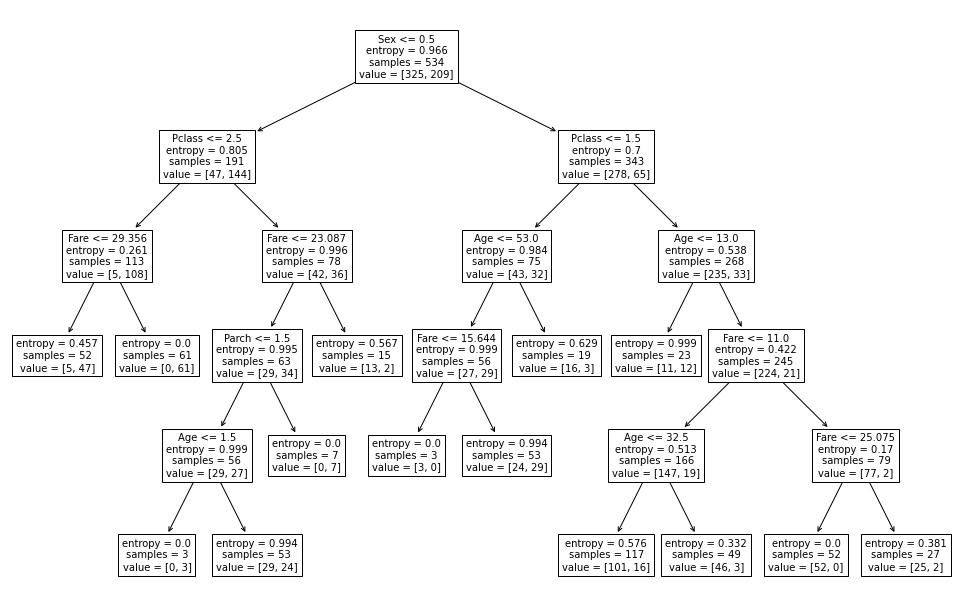

In [30]:
plt.figure(figsize=(17,11))
plot_tree(clf_b, feature_names = list(X_train.columns), fontsize=10)
plt.show()

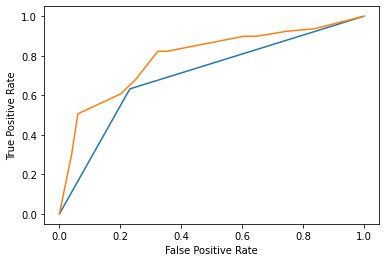

In [80]:
fpr, tpr, _ = roc_curve(y_test,  estimate)
fpr_b, tpr_b, _ = roc_curve(y_test,  estimate_b)


#create ROC curve
plt.plot(fpr,tpr)
plt.plot(fpr_b,tpr_b)

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [81]:
# AUC
print(auc(fpr,tpr))
print(auc(fpr_b,tpr_b))

0.7005498018156247
0.7906917274005881


#### Hyperparameters optimization

In [85]:
for max_depth in range(2, 10):
    # calling decisiontree classifier
    clf_it = DecisionTreeClassifier(criterion= 'entropy', max_depth=max_depth, min_samples_split=0.1)
    # fitting on data
    clf_it = clf_it.fit(X_train, y_train)
    # estimating on test
    estimate_it = clf_it.predict_proba(X_test)[:,1]
    
    # auc
    fpr_it, tpr_it, _ = roc_curve(y_test,  estimate_it)
    auc_it = auc(fpr_it, tpr_it)
    # accuracy
    #accuracy = accuracy_score(y_test, estimate_it, normalize=True, sample_weight=None)
    
    
    print('max_depth: ' + str(max_depth))
    #print('accuracy: ' + str(accuracy))
    print('auc: ' + str(auc_it))

max_depth: 2
auc: 0.7770745428973276
max_depth: 3
auc: 0.8164556962025318
max_depth: 4
auc: 0.7863444572305331
max_depth: 5
auc: 0.7906917274005881
max_depth: 6
auc: 0.7862165963431786
max_depth: 7
auc: 0.789029535864979
max_depth: 8
auc: 0.7943996931338704
max_depth: 9
auc: 0.7943996931338704


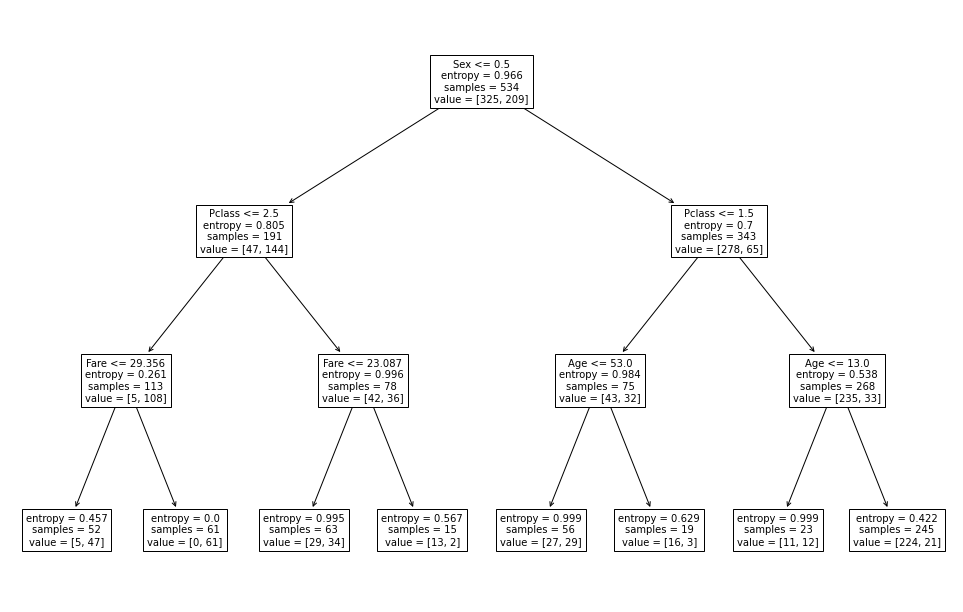

In [84]:
# plotting best tree
# calling decisiontree classifier
clf_b1 = DecisionTreeClassifier(criterion= 'entropy', max_depth=3, min_samples_split=0.1)
# fitting on data
clf_b1 = clf_b1.fit(X_train, y_train)

plt.figure(figsize=(17,11))
plot_tree(clf_b1, feature_names = list(X_train.columns), fontsize=10)
plt.show()

##### Grid search

Hyperparameter space

In [89]:
param_space = {'criterion':[ 'entropy', 'Gini'], 
               'max_depth': list(range(2,10,1)),
               #'min_samples_split':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.],
               'min_samples_split':[0.01, 0.02, 0.03, 0.04, 0.05],
               'random_state': [42]}

calling classifier

In [90]:
clf_grid = DecisionTreeClassifier()

trainnig gridsearch on classifier

In [98]:
grid_search_tree = GridSearchCV(estimator=clf_grid,
                                param_grid=param_space,
                                scoring='roc_auc',
                                cv=7)

# running search
grid_search_tree.fit(X, y.values)

C:\Users\eliel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eliel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eliel\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\eliel\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 333, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'Gini'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eliel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Trace

C:\Users\eliel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eliel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eliel\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\eliel\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 333, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'Gini'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eliel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Trace

C:\Users\eliel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eliel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eliel\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\eliel\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 333, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'Gini'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eliel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Trace

C:\Users\eliel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eliel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eliel\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\eliel\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 333, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'Gini'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eliel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Trace

C:\Users\eliel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eliel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eliel\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\eliel\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 333, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'Gini'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eliel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Trace

C:\Users\eliel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eliel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eliel\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\eliel\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 333, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'Gini'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eliel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Trace

C:\Users\eliel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eliel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eliel\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\eliel\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 333, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'Gini'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eliel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Trace

C:\Users\eliel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eliel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eliel\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\eliel\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 333, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'Gini'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eliel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Trace

C:\Users\eliel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eliel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eliel\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\eliel\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 333, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'Gini'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eliel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Trace

C:\Users\eliel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eliel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eliel\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\eliel\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 333, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'Gini'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eliel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Trace

C:\Users\eliel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\eliel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\eliel\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 890, in fit
    super().fit(
  File "C:\Users\eliel\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 333, in fit
    criterion = CRITERIA_CLF[self.criterion](self.n_outputs_,
KeyError: 'Gini'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\eliel\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Trace

GridSearchCV(cv=7,
             estimator=DecisionTreeClassifier(criterion='entropy', max_depth=4,
                                              min_samples_split=0.01,
                                              random_state=42),
             param_grid={'criterion': ['entropy', 'Gini'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [0.01, 0.02, 0.03, 0.04, 0.05],
                         'random_state': [42]},
             scoring='roc_auc')

In [99]:
best_parameters = grid_search_tree.best_params_
best_auc = grid_search_tree.best_score_
print('best parameters: ' + str(best_parameters))
print('best auc: ' + str(best_auc))

best parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 0.03, 'random_state': 42}
best auc: 0.8363464251487613


In [94]:
clf_grid.set_params(** best_parameters)
clf_grid.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=0.01,
                       random_state=42)

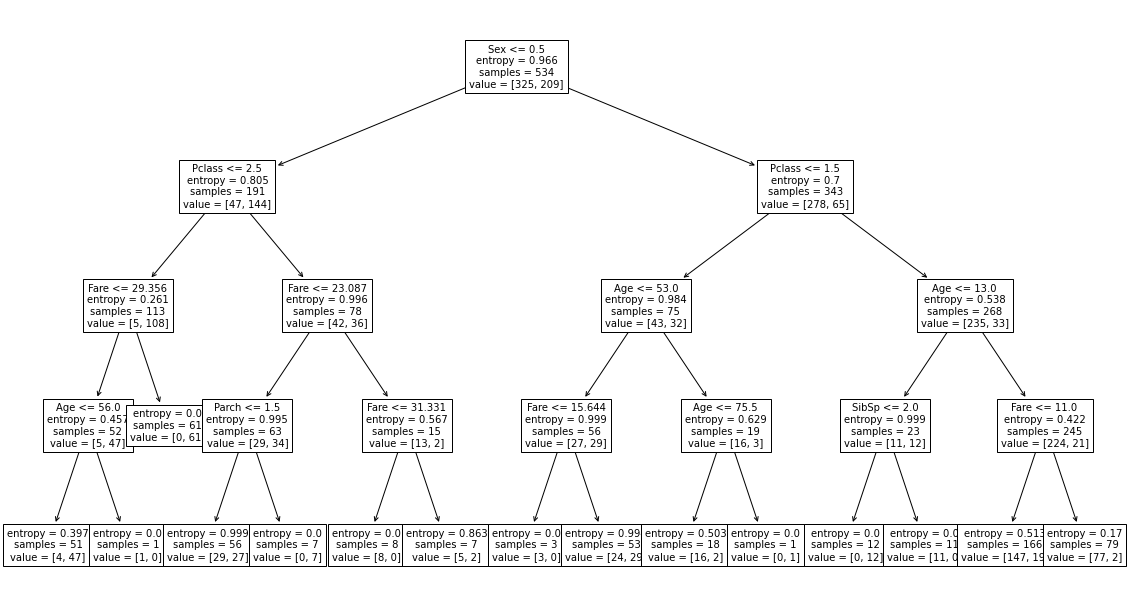

In [95]:
plt.figure(figsize=(20,11))
plot_tree(clf_grid, feature_names = list(X.columns), fontsize=10)
plt.show()

#### Cross validation

In [117]:
auc_list = []
rs = range(1000)
for random_state in rs: 

    # splitting into train test
    X_train1, X_valid, y_train1, y_valid = train_test_split(X, y, test_size = 0.20,
                                                            random_state=random_state)
    # calling decisiontree classifier
    clf_cv = DecisionTreeClassifier(criterion= 'entropy', max_depth=5, min_samples_split=0.03)
    # fitting on data
    clf_cv = clf_cv.fit(X_train1, y_train1)
    # estimating on test
    estimate_cv = clf_cv.predict_proba(X_valid)[:,1]
    #estimate_b = clf_b.predict(X_test)
    
    # building AUC
    fpr_cv, tpr_cv, _ = roc_curve(y_valid,  estimate_cv)
    auc_cv = auc(fpr_cv, tpr_cv)
    auc_list.append(auc_cv)

np.mean(auc_list)

0.8360923700915261

In [122]:
auc_list

[0.8750499800079969,
 0.8367139959432048,
 0.7851643778610071,
 0.8437247780468119,
 0.8473932676518883,
 0.8701075268817204,
 0.8651115618661258,
 0.8286157024793388,
 0.8274591796097172,
 0.827557058326289,
 0.8333333333333335,
 0.823529411764706,
 0.7599959200326398,
 0.8610441767068273,
 0.821078431372549,
 0.8517478152309613,
 0.8335373317013465,
 0.8335699797160243,
 0.789846025801082,
 0.8477608956417433,
 0.8548580567772891,
 0.8507889546351086,
 0.8708998226950355,
 0.8447336561743343,
 0.7839357429718874,
 0.8318672530987604,
 0.8813459268004722,
 0.8808316430020283,
 0.7757594417077176,
 0.793859649122807,
 0.8980346576500422,
 0.8173930589184827,
 0.814655172413793,
 0.7986891385767789,
 0.8079483978360382,
 0.8830304311073542,
 0.8262890955198647,
 0.8358490566037737,
 0.8566573370651739,
 0.8519514137793707,
 0.825,
 0.8715072805981897,
 0.7568452380952381,
 0.8405797101449275,
 0.771243842364532,
 0.8218712514994002,
 0.8144578313253013,
 0.8183077578857629,
 0.842089249

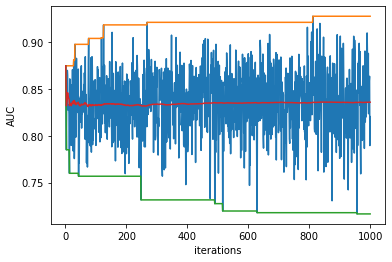

In [123]:
# convergence of CrossValidation
iterations = range(1,len(rs)+1)
cum_max_list = [max(auc_list[:i+1]) for i in range(len(auc_list))]
cum_min_list = [min(auc_list[:i+1]) for i in range(len(auc_list))]
cum_mean_list = [np.mean(auc_list[:i+1]) for i in range(len(auc_list))]

plt.plot(iterations,auc_list)
plt.plot(iterations,cum_max_list)
plt.plot(iterations,cum_min_list)
plt.plot(iterations,cum_mean_list)

plt.ylabel('AUC')
plt.xlabel('iterations')
plt.show()

In [121]:
scores = cross_val_score(clf_cv, X, y, cv=200, scoring='roc_auc')
np.mean(scores)

0.8539583333333334